# Objective-2 Time Invariant Face Recognition using Convolutional Neural Network (CNN)

## I have included the trained Saved model and its loss and accuracy history by the following titles in github repository:
### 1 - model_july30.h5    (Trained Convolutional Netowork Model)
### 2 - history_july30.json    (Accuracy and Loss history of Trained Convlutional Netowork Model)

## Step-1 Importing Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
# for reproducibility
import numpy as np
np.random.seed(1337) 

In [3]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping,TensorBoard

from keras_preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import os ,PIL
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Location of folder with all the data and other files

In [4]:
dir=os.getcwd()
dir


'F:\\Time-Invariant  aging model Final\\Objective_2'

In [226]:
#data_folder_location='/content/drive/My Drive/Aging model/fg'

# Step-2 Putting all files into a single dataframe

In [155]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir(dir +'/datafiles')]

final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv(dir +'/datafiles/'+d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

In [157]:
final_df.head()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.80607,0.336661,0.390837,0.828399,0.521382,0.59903,0.34635,2
0,1,0.852819,0.442643,0.38698,0.774311,0.461004,0.659254,0.393676,5
0,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.30682,0.384508,8
0,1,0.883831,0.395061,0.415456,0.69811,0.419721,0.409635,0.361281,10
0,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14


In [158]:
final_df.tail()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,82,0.97119,0.456241,0.431464,0.688562,0.362097,0.776495,0.421004,22
0,82,0.922055,0.457388,0.366031,0.807954,0.40289,0.800289,0.386978,23
0,82,0.948693,0.473651,0.409538,0.731037,0.290797,0.600109,0.465623,25
0,82,0.914195,0.500786,0.416904,0.543606,0.480518,0.876548,0.394899,27
0,82,0.915017,0.478165,0.404374,0.681841,0.316847,0.735635,0.450559,31


### Saving the prepared data in csv format

In [228]:
#saving the dataframe
final_df.to_csv(dir +'/final_df.csv',index=False)

In [5]:
final_df=pd.read_csv(dir +'/final_df.csv')

In [6]:
final_df.head(10)

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14
5,1,0.944314,0.407135,0.408512,0.743147,0.440906,0.666368,0.396383,16
6,1,0.938624,0.454377,0.402658,0.758165,0.442331,0.901291,0.483564,18
7,1,1.024863,0.554703,0.452378,0.474424,0.469262,0.855291,0.362965,19
8,1,0.978536,0.473956,0.431465,0.604435,0.408842,0.749188,0.407392,22
9,1,1.019712,0.487711,0.462661,0.578721,0.349971,0.436990,0.439276,28


In [161]:
final_df.tail(10)

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
992,82,0.823877,0.400643,0.389182,0.799787,0.455590,0.469132,0.304340,3
993,82,0.956653,0.436934,0.390209,0.783629,0.394072,0.555210,0.398375,16
994,82,0.999093,0.510771,0.387691,0.752627,0.389192,0.440878,0.367898,18
995,82,0.961396,0.486345,0.373479,0.883768,0.357279,0.411729,0.388931,20
996,82,0.944901,0.469341,0.421650,0.657527,0.342256,0.299782,0.377414,21
997,82,0.971190,0.456241,0.431464,0.688562,0.362097,0.776495,0.421004,22
998,82,0.922055,0.457388,0.366031,0.807954,0.402890,0.800289,0.386978,23
999,82,0.948693,0.473651,0.409538,0.731037,0.290797,0.600109,0.465623,25
1000,82,0.914195,0.500786,0.416904,0.543606,0.480518,0.876548,0.394899,27
1001,82,0.915017,0.478165,0.404374,0.681841,0.316847,0.735635,0.450559,31


# Step-3 Removing un necessary columns
#### We dont need the following face measurements as we will use only raw images
##### removing Facial Index 	Mandibular Index 	Intercantal Index 	Orbital Width Index 	Eye Fissure Index 	Vermilion Height Index 	Mouth Face Width Index

In [7]:
# removing the un necessary features
final_df.drop(final_df.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True) 

In [8]:
final_df.head(10)

,ID,AGE
0,1,2
1,1,5
2,1,8
3,1,10
4,1,14
5,1,16
6,1,18
7,1,19
8,1,22
9,1,28


In [164]:
final_df.tail(10)

,ID,AGE
992,82,3
993,82,16
994,82,18
995,82,20
996,82,21
997,82,22
998,82,23
999,82,25
1000,82,27
1001,82,31


# Step-4 Displaying Class distribution of the given data

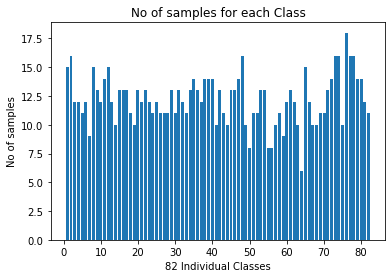

In [9]:
classes=final_df[['ID']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('No of samples for each Class')
plt.xlabel('82 Individual Classes')
plt.ylabel('No of samples')
plt.show()

# Step-5 One hot encoding of the target labels

In [201]:
# use pd.concat to join the new columns with your original dataframe
df_1 = pd.concat([final_df['ID'],pd.get_dummies(final_df['ID'], prefix='subject')],axis=1)

### Saving the prepared data in csv format by the name of ' df_1.csv '

In [12]:
#saving the above dataframe as csv
df_1.to_csv(dir +'\df_1.csv',mode = 'w', index=False)

In [7]:
df_1=pd.read_csv(dir +'/df_1.csv')

In [8]:
df_1.head()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_73,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
df_1.tail()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_73,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82
997,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1001,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Step-6 Adding original image names to the dataframe
### Note : "fg" folder contains the 1002 images in .JPG format

In [206]:
# addng file names to the dataframe as a new columns called 'fiale_name"
image_names=[]
for i in os.listdir(dir +'/fg'):
    image_names.append(i)

In [207]:
len(image_names)

1002

In [208]:
df_1['file_name']=image_names

In [209]:
df_1.head()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82,file_name
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A14.JPG


In [210]:
df_1.tail()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82,file_name
997,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A22.JPG
998,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A23.JPG
999,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A25.JPG
1000,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A27.JPG
1001,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A31.JPG


In [211]:
df_1['file_name'] = df_1['file_name'].sort_values(ascending=True).values

In [213]:
df_1.head()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82,file_name
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A14.JPG


In [212]:
df_1.tail()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82,file_name
997,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A22.JPG
998,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A23.JPG
999,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A25.JPG
1000,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A27.JPG
1001,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A31.JPG


### Saving the prepared data in csv format by the name of ' df_2.csv ' 

In [214]:
#saving the above dataframe as csv
df_1.to_csv(dir +'\df_2.csv',mode = 'w', index=False)

In [11]:
df_2=pd.read_csv(dir +'\df_2.csv')
df_2.head()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82,file_name
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A14.JPG


In [12]:
df_2.tail()

,ID,subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,...,subject_74,subject_75,subject_76,subject_77,subject_78,subject_79,subject_80,subject_81,subject_82,file_name
997,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A22.JPG
998,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A23.JPG
999,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A25.JPG
1000,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A27.JPG
1001,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A31.JPG


# Step- Splitting data in training and validation sets

In [275]:
 train_size = len(df['ID'].unique()) * .8
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(df['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, df[df['ID']==i]])
    else:
        valid = pd.concat([valid, df[df['ID']==i]])
 

In [276]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 66 people
Validation  Set Has: 16 people


In [33]:
train.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,...,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A14.JPG


In [34]:
valid.tail()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,...,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
207,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A22.JPG
208,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A23.JPG
209,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A25.JPG
210,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A27.JPG
211,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,082A31.JPG


# Step- Preparing Test data

### The unique ID of persons in train dataframe

In [224]:
np.unique(train.ID.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
      dtype=int64)

### taking data of 8 person out from the training dataframe to use in test data

In [277]:
test_ids= [ 34,35, 36, 37, 38, 39, 40, 41] 

In [278]:
# # selecting rows based on condition 
test= train[train['ID'].isin(test_ids)] 
test.head(5)

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,...,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
404,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,034A02.JPG
405,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,034A04.JPG
406,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,034A11.JPG
407,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,034A13.JPG
408,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,034A15.JPG


In [279]:
print(train.shape, valid.shape,test.shape )

(790, 84) (212, 84) (104, 84)


In [228]:
# # removing the Test IDs from the Traind data
# # removing 34,35, 36, 37, 38, 39, 40, 41 indices
train_ids=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '42', '43', '44', '45', '46', '47',
        '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
        '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
        '72', '73', '74', '75', '76', '77', '78', '79', '80', '81']

In [229]:
train= train[train['ID'].isin(train_ids)] 
train.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,...,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A14.JPG


In [230]:
print(train.shape, valid.shape,test.shape )

(686, 84) (212, 84) (104, 84)


In [231]:
print('Training    Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')
print('.....Test   Set Has:  ' + str(len(test.groupby('ID').count())) + ' people')

Training    Set Has: 58 people
Validation  Set Has: 16 people
.....Test   Set Has:  8 people


## Saving results of Training, Validation and Testing Data

In [233]:

train.to_csv(dir +'/train_1.csv',index=False)
valid.to_csv(dir+'/valid_1.csv',index=False)
test.to_csv(dir+'/test_1.csv',index=False)

In [13]:
train=pd.read_csv(dir+'/train_1.csv')
valid=pd.read_csv(dir+'/valid_1.csv')
test=pd.read_csv(dir+'/test_1.csv')

In [14]:
print(train.shape,valid.shape,test.shape)

(686, 84) (212, 84) (104, 84)


# Taking out two photos for prediction

# Function to find the index of images

In [64]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

#  For testing purpose ,dropping images 057A18.JPG ,032A28.JPG
# Class Number of these images=57 and 10 respectively

In [95]:
image_path_1=dir + '/fg/057A18.JPG'
image_path_2=dir + '/fg/032A28.JPG'

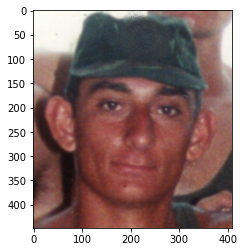

In [96]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(image_path_1)
imgplot = plt.imshow(img)
plt.show()

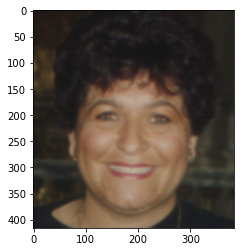

In [97]:
img=mpimg.imread(image_path_2)
imgplot = plt.imshow(img)
plt.show()

## Get index of 1st image

In [98]:
getIndexes(train, '057A18.JPG')

[(583, 'file_name')]

## Get index of 2nd image

In [99]:
getIndexes(train ,'032A28.JPG')

[(389, 'file_name')]

In [21]:
train2=train

# Removing Both the images (for prediction) from the Training Set

In [100]:
train2.drop([583,389],inplace=True)

In [101]:
train2.shape

(682, 84)

### Saving the new Train data (without the 2 images)

In [243]:
train2.to_csv(dir + '/train_2.csv',index=False)

In [15]:
train2=pd.read_csv(dir +'/train_2.csv')

In [16]:
test=pd.read_csv(dir+'/test_1.csv')

In [17]:
print('Training    Set Has: ' + str(len(train2.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')
print('.....Test   Set Has:  ' + str(len(test.groupby('ID').count())) + ' people')

Training    Set Has: 58 people
Validation  Set Has: 16 people
.....Test   Set Has:  8 people


## Target Labels

In [18]:
import re
train2.rename(columns=lambda x: re.sub("person", "subject", x),inplace=True)

In [19]:
train2.columns

Index(['ID', 'subject_1', 'subject_2', 'subject_3', 'subject_4', 'subject_5',
       'subject_6', 'subject_7', 'subject_8', 'subject_9', 'subject_10',
       'subject_11', 'subject_12', 'subject_13', 'subject_14', 'subject_15',
       'subject_16', 'subject_17', 'subject_18', 'subject_19', 'subject_20',
       'subject_21', 'subject_22', 'subject_23', 'subject_24', 'subject_25',
       'subject_26', 'subject_27', 'subject_28', 'subject_29', 'subject_30',
       'subject_31', 'subject_32', 'subject_33', 'subject_34', 'subject_35',
       'subject_36', 'subject_37', 'subject_38', 'subject_39', 'subject_40',
       'subject_41', 'subject_42', 'subject_43', 'subject_44', 'subject_45',
       'subject_46', 'subject_47', 'subject_48', 'subject_49', 'subject_50',
       'subject_51', 'subject_52', 'subject_53', 'subject_54', 'subject_55',
       'subject_56', 'subject_57', 'subject_58', 'subject_59', 'subject_60',
       'subject_61', 'subject_62', 'subject_63', 'subject_64', 'subject_65',
  

In [ ]:
## for target, all columns are used except for 'ID' and 'File_name' columns

In [20]:
target_columns=['subject_1', 'subject_2', 'subject_3', 'subject_4', 'subject_5',
       'subject_6', 'subject_7', 'subject_8', 'subject_9', 'subject_10',
       'subject_11', 'subject_12', 'subject_13', 'subject_14', 'subject_15',
       'subject_16', 'subject_17', 'subject_18', 'subject_19', 'subject_20',
       'subject_21', 'subject_22', 'subject_23', 'subject_24', 'subject_25',
       'subject_26', 'subject_27', 'subject_28', 'subject_29', 'subject_30',
       'subject_31', 'subject_32', 'subject_33', 'subject_34', 'subject_35',
       'subject_36', 'subject_37', 'subject_38', 'subject_39', 'subject_40',
       'subject_41', 'subject_42', 'subject_43', 'subject_44', 'subject_45',
       'subject_46', 'subject_47', 'subject_48', 'subject_49', 'subject_50',
       'subject_51', 'subject_52', 'subject_53', 'subject_54', 'subject_55',
       'subject_56', 'subject_57', 'subject_58', 'subject_59', 'subject_60',
       'subject_61', 'subject_62', 'subject_63', 'subject_64', 'subject_65',
       'subject_66', 'subject_67', 'subject_68', 'subject_69', 'subject_70',
       'subject_71', 'subject_72', 'subject_73', 'subject_74', 'subject_75',
       'subject_76', 'subject_77', 'subject_78', 'subject_79', 'subject_80',
       'subject_81', 'subject_82']

# **Further Processing for developing Deep Leartning Model**

## **First doing Face Augmentation only for the Train Data**

In [21]:
## Defining Augmentation object using ImageDataGenerator
Training_Augmentation_generator = ImageDataGenerator(
rotation_range=-45,
rescale=1./255,
width_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,)

## Train generator

In [22]:
training__generator=Training_Augmentation_generator.flow_from_dataframe(
dataframe=train2,
directory=dir +"/fg",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(150,150))

Found 684 validated image filenames.


## Validation generator

In [23]:
validation__data_generator = ImageDataGenerator(rescale=1./255)

validation___generator=validation__data_generator.flow_from_dataframe(
dataframe=valid,
directory=dir +"/fg",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(150,150))
#note use Shuffle false to get reproducable results

Found 212 validated image filenames.


##  Test generator



In [24]:
testing__data_generator = ImageDataGenerator(rescale=1./255)

testing__generator=testing__data_generator.flow_from_dataframe(
dataframe=test,
directory=dir +"/fg",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(150,150))
#note use Shuffle false to get reproducable results

Found 104 validated image filenames.


# **Buidling Convlutional Network Model**

In [35]:
# adding regularization
from keras.regularizers import l2
from keras.layers.advanced_activations import LeakyReLU
act = LeakyReLU(alpha=0.1)

# The Convolution Network Model

# New Model-6 after removing L2 Regularization (in previous attempt)

In [36]:
## 
model6 =Sequential()

model6.add(Conv2D(32, (3, 3), input_shape=(150,150, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


model6.add(Conv2D(64, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


#model6.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model6.add(Conv2D(128, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


#4model6.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model6.add(Conv2D(128, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))

#5
model6.add(Conv2D(256, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))
#6
model6.add(Flatten())
model6.add(Dropout(0.2))
model6.add(Dense(128))
model6.add(act)

model6.add(Dense(82, activation='sigmoid'))
#model5.add(Dense(82, activation=tf.nn.log_softmax))

# Summary of the Model 

In [37]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)       

## Compiling Model-6

In [130]:
model6.compile(loss='binary_crossentropy',
optimizer=optimizers.Adam(learning_rate=1e-5),
metrics=['accuracy'])

# **Model-6 Training Begins**

In [63]:
SIZE_OF_STEP_FOR_TRAINING=training__generator.n//training__generator.batch_size
SIZE_OF_STEP_FOR_VALIDATION=validation___generator.n//validation___generator.batch_size

history1=model6.fit_generator(generator=training__generator,
                    steps_per_epoch=SIZE_OF_STEP_FOR_TRAINING,
                    validation_data=validation___generator,
                    validation_steps=SIZE_OF_STEP_FOR_VALIDATION,
                    epochs=12 
                   
)

Epoch 1/12
21/21 [==============================] - 160s 8s/step - loss: 0.6810 - accuracy: 0.3895 - val_loss: 0.6859 - val_accuracy: 0.4998
Epoch 2/12
21/21 [==============================] - 156s 7s/step - loss: 0.6598 - accuracy: 0.4863 - val_loss: 0.6774 - val_accuracy: 0.5644
Epoch 3/12
21/21 [==============================] - 184s 9s/step - loss: 0.6298 - accuracy: 0.5496 - val_loss: 0.6628 - val_accuracy: 0.6236
Epoch 4/12
21/21 [==============================] - 186s 9s/step - loss: 0.5847 - accuracy: 0.5948 - val_loss: 0.6369 - val_accuracy: 0.6795
Epoch 5/12
21/21 [==============================] - 154s 7s/step - loss: 0.5147 - accuracy: 0.6376 - val_loss: 0.5874 - val_accuracy: 0.7074
Epoch 6/12
21/21 [==============================] - 137s 7s/step - loss: 0.4254 - accuracy: 0.6772 - val_loss: 0.5162 - val_accuracy: 0.7373
Epoch 7/12
21/21 [==============================] - 137s 7s/step - loss: 0.3289 - accuracy: 0.7105 - val_loss: 0.4345 - val_accuracy: 0.7597
Epoch 8/12
21

# Saving the Model-6

In [35]:
model_path=dir +'/model__july30.h5'
# saving model
model6.save(model_path)

# Saving Losses and Accuracy History Parameters of the Model-6

In [292]:
import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history1.history

In [ ]:
# # Save it under the form of a json file
history_path=dir +'/history__july30.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Loading the Saved Model-6

In [25]:
from keras.models import load_model 
model_path=dir +'/model_july30.h5'
loaded_model = load_model(model_path) 

# Loading History of Accuracy and Losses of the Model-6

In [26]:
import json
history_path=dir +'/history_july30.json'
history= json.load(open(history_path, 'r'))

In [27]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

# **Plotting Losses and Accuracy History of the Model-6**

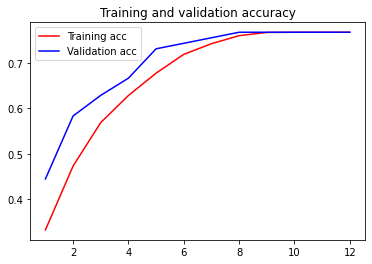

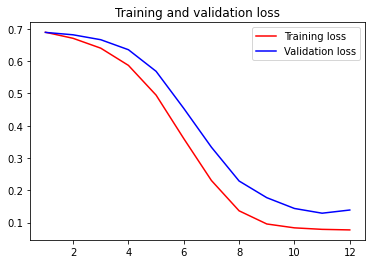

In [30]:
### .
acc = history_1['accuracy']
#acc=np.array(acc)
val_acc = history_1['val_accuracy']
#val_acc=np.array(val_acc)
loss = history_1['loss']
val_loss = history_1['val_loss']
epochs = range(1, len(acc) + 1)
acc=np.array(acc)
val_acc=np.array(val_acc)
plt.plot(epochs, np.array(acc) , 'r', label='Training acc')
plt.plot(epochs, np.array(val_acc) , 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Loading pre trained Model

In [134]:
from keras.models import load_model 
model_path=dir +'/model_july30.h5'
loaded_model = load_model(model_path) 

## **Model Evaluation on un seen data** (i.e Test Data)

In [31]:
import PIL
from keras_preprocessing import image

In [34]:
score=loaded_model.evaluate_generator(testing__generator)
score=np.array(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10871367156505585
Test accuracy: 0.7678048300743103


# # We can see that we have 76.78% accuracy and 10.87% losses on the unseen data (i.e The Test data)

# *xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx*

# **Manual Verification of Predictions of CNN Model**

# Prediction of Classes for the 2 Images taken out before training

# Predicting class for 057A18.JPG (which has Class=57)

In [90]:
image_path_1=dir + '/fg/057A18.JPG'
image_path_2=dir + '/fg/032A28.JPG'

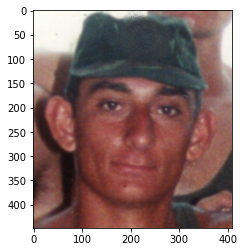

In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(image_path_1)
imgplot = plt.imshow(img)
plt.show()

In [44]:
from keras_preprocessing import image

In [91]:
test_image = image.load_img(image_path_1, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
testing__generator.reset()
prediction = loaded_model.predict(test_image)
np.argmax(prediction, axis=1)

array([57], dtype=int64)

# # The manual verification for prediction for the un seen image 057A18.JPG of Class 57 is correct as 57 

# Predicting class for 032A28.JPG (which has Class=32)

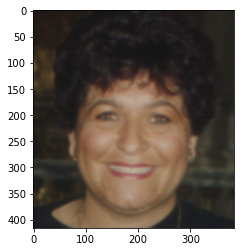

In [93]:
img=mpimg.imread(image_path_2)
imgplot = plt.imshow(img)
plt.show()

In [94]:
test_image = image.load_img(image_path_2, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
testing__generator.reset()
prediction = loaded_model.predict(test_image)
np.argmax(prediction, axis=1)

array([32], dtype=int64)

# The manual verification for prediction for the un seen image 032A28.JPG of Class 32 is correct as 32 